# **Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same dataset for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.** # 

In [ ]:
# **EM Algorithm** #

Red mean: 2.997142582038222 ::::::::: Blue mean: 7.036259959647933
Red std: 0.8992704481319626 ::::::::: Blue std: 0.7882001074294297


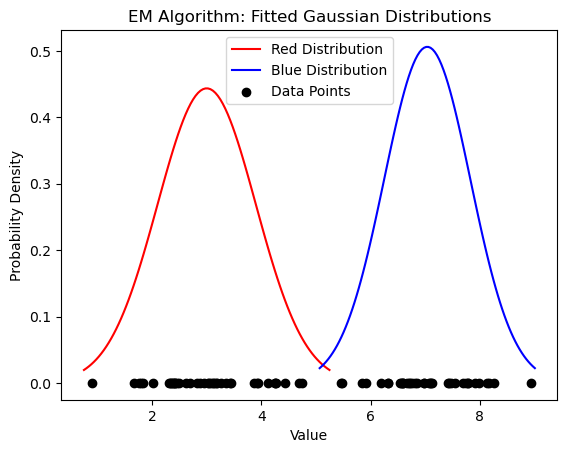

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(110)

# Set parameters for the red and blue distributions
red_mean = 3
red_std = 0.8
blue_mean = 7
blue_std = 1

# Draw samples from normal distributions
red_samples = np.random.normal(red_mean, red_std, size=40)
blue_samples = np.random.normal(blue_mean, blue_std, size=40)

# Combine and sort the samples
both_colours = np.sort(np.concatenate((red_samples, blue_samples)))

# Initial guesses for the EM algorithm
red_mean_guess = 2.1
blue_mean_guess = 6
red_std_guess = 1.5
blue_std_guess = 0.8

# EM algorithm: Iterate to refine estimates
for _ in range(10):
    # Compute the likelihood of each sample under the current guesses
    likelihood_of_red = stats.norm(red_mean_guess, red_std_guess).pdf(both_colours)
    likelihood_of_blue = stats.norm(blue_mean_guess, blue_std_guess).pdf(both_colours)

    # Normalize the weights
    likelihood_total = likelihood_of_red + likelihood_of_blue
    red_weight = likelihood_of_red / likelihood_total
    blue_weight = likelihood_of_blue / likelihood_total

    # Function to estimate mean
    def estimate_mean(data, weight):
        return np.sum(data * weight) / np.sum(weight)

    # Function to estimate standard deviation
    def estimate_std(data, weight, mean):
        variance = np.sum(weight * (data - mean) ** 2) / np.sum(weight)
        return np.sqrt(variance)

    # Update estimates for the standard deviation
    red_std_guess = estimate_std(both_colours, red_weight, red_mean_guess)
    blue_std_guess = estimate_std(both_colours, blue_weight, blue_mean_guess)

    # Update estimates for the mean
    red_mean_guess = estimate_mean(both_colours, red_weight)
    blue_mean_guess = estimate_mean(both_colours, blue_weight)

# Print the final model parameters
print("Red mean:", red_mean_guess, ":::::::::", "Blue mean:", blue_mean_guess)
print("Red std:", red_std_guess, ":::::::::", "Blue std:", blue_std_guess)

# Plot the data and the fitted distributions
x_range_red = np.linspace(red_mean_guess - 2.5 * red_std_guess, red_mean_guess + 2.5 * red_std_guess, 100)
x_range_blue = np.linspace(blue_mean_guess - 2.5 * blue_std_guess, blue_mean_guess + 2.5 * blue_std_guess, 100)

# Use scipy.stats.norm.pdf to compute the probability densities
plt.plot(x_range_red, stats.norm.pdf(x_range_red, red_mean_guess, red_std_guess), label='Red Distribution', color='red')
plt.plot(x_range_blue, stats.norm.pdf(x_range_blue, blue_mean_guess, blue_std_guess), label='Blue Distribution', color='blue')

# Plot the data points
plt.scatter(both_colours, np.zeros_like(both_colours), color='black', marker='o', label='Data Points')
plt.title('EM Algorithm: Fitted Gaussian Distributions')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


# **K-Mean** #

C:\Users\drona\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\drona\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\drona\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\drona\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

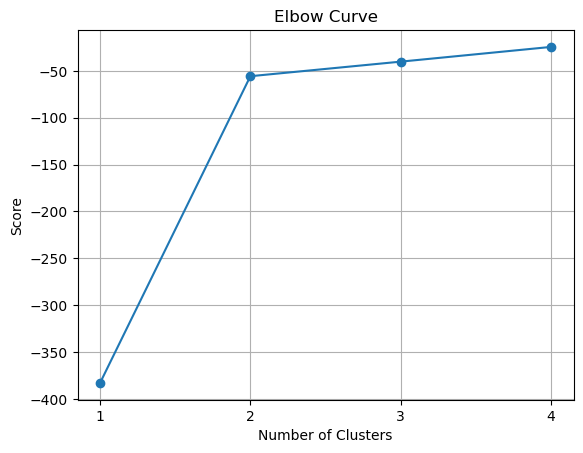

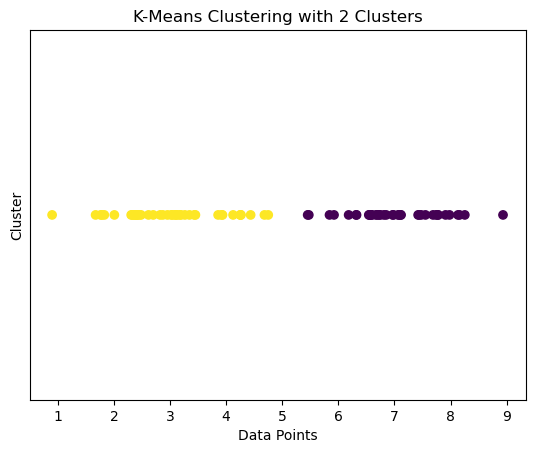

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(110)

# Set parameters for the normal distributions
red_mean = 3
red_std = 0.8
blue_mean = 7
blue_std = 1

# Draw samples from the normal distributions
red_samples = np.random.normal(red_mean, red_std, size=40)
blue_samples = np.random.normal(blue_mean, blue_std, size=40)

# Combine and sort the samples
both_colours = np.sort(np.concatenate((red_samples, blue_samples)))

# Initialize the KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans_output = kmeans.fit(both_colours.reshape(-1, 1))

# Use the elbow method to find the optimal number of clusters
Nc = range(1, 5)
kmeans_models = [KMeans(n_clusters=i) for i in Nc]
scores = [model.fit(both_colours.reshape(-1, 1)).score(both_colours.reshape(-1, 1)) for model in kmeans_models]

# Plot the elbow curve
plt.plot(Nc, scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(Nc)  # Show integer ticks
plt.grid()
plt.show()

# Plot the data points with their assigned cluster colors
plt.scatter(both_colours, np.zeros_like(both_colours), c=kmeans_output.labels_, cmap='viridis')
plt.xlabel('Data Points')
plt.ylabel('Cluster')
plt.title('K-Means Clustering with 2 Clusters')
plt.yticks([])  # Remove y-ticks since they are not informative
plt.show()
